# Activity: Perform logistic regression 

## Introduction

In this activity, you will complete an effective bionomial logistic regression. This exercise will help you better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help you build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [1]:
# Standard operational package imports
import pandas as pd
import numpy as np

# Important imports for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

The dataset **Invistico_Airline.csv** is loaded. The resulting pandas DataFrame is saved as a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_original = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows

Output the first 10 rows of data.

In [3]:
# Display the first 10 rows of the dataset
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [4]:
# Check data types of all columns
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

In [5]:
# Count the number of satisfied vs. dissatisfied customers
df_original['satisfaction'].value_counts(dropna=False)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `value_counts()` function. To examine how many NaN values there are, set the `dropna` parameter passed in to this function to `False`.

</details>

**Question:** How many satisfied and dissatisfied customers were there?

There were 71,087 satisfied customers and 58,793 dissatisfied customers.

**Question:** What percentage of customers were satisfied?

To calculate the percentage:

Percentage satisfied
=
71087 /
(71087
+
58793)
×
100
≈
54.75
%


### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [6]:
# Check for missing values in each column
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the `inflight entertainment` column?

Yes, you should remove rows where the Arrival Delay in Minutes column has missing values, even if the main focus is on the Inflight entertainment column.

This is because logistic regression models require complete cases—rows with no missing values—in order to function properly. Even if Arrival Delay in Minutes is not a primary variable of interest, retaining rows with missing data can introduce errors during model training or lead to biased estimates. To ensure data quality and model reliability, it’s best to either drop or impute missing values appropriately.

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [7]:
# Drop rows with missing values and reset the index
df_subset = df_original.dropna(axis=0).reset_index(drop=True)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Prepare the data

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

In [8]:
# Convert 'Inflight entertainment' to float
df_subset = df_subset.astype({"Inflight entertainment": float})

<details>
    
  <summary><h4><strong>Hint 1</strong></h4></summary>
Use the `.astype()` function with the dictionary `{"Inflight entertainment": float}` as an input.

</details>

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [9]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder with drop='first' to avoid multicollinearity
encoder = OneHotEncoder(drop='first')

# Fit and transform the 'satisfaction' column, then convert to array
encoded_satisfaction = encoder.fit_transform(df_subset[['satisfaction']]).toarray()

# Update the 'satisfaction' column with the numeric encoded values
df_subset['satisfaction'] = encoded_satisfaction

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `OneHotEncoder()` from `sklearn.preprocessing`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Call `OneHotEncoder()`, specifying the `drop` argument as `'first'` in order to remove redundant columns from the output. 

Call `.fit_transform()`, passing in the subset of the data that you want to encode (the subset consisting of `satisfaction`). 

Call `.toarray()` in order to convert the sparse matrix that `.fit_transform()` returns into an array.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Index `df_subset` with a double pair of square brackets to get a DataFrame that consists of just `satisfaction`.

After getting the encoded values, update the `satisfaction` column (you can use reassignment).

</details>

### Output the first 10 rows of `df_subset`

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of `df_subset`.

In [10]:
# Output the first 10 rows of the updated DataFrame
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are outputted, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want.

</details>

### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


In [11]:
from sklearn.model_selection import train_test_split

# Define the independent variable (X) and the dependent variable (y)
X = df_subset[['Inflight entertainment']]
y = df_subset['satisfaction']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If you named your independent variable `X` and your dependent variable `y`, then it would be `train_test_split(X, y, test_size=0.30, random_state=42)`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

When you use `train_test_split`, pass in `42` to `random_state`. `random_state` is used so that if other data professionals run this code, they can get the same exact train test split. If you use a different random state, your results will differ. </details>

**Question:** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable? 

Using inflight entertainment as the sole independent variable to predict customer satisfaction may not be the most effective approach. While inflight entertainment could have an impact on customer satisfaction, it's likely that other factors (such as seat comfort, food and drink quality, on-board service, and the overall flight experience) also play a significant role. Relying solely on inflight entertainment might lead to a model that overlooks these other contributing factors, which could reduce the model's accuracy and predictive power.

## Step 3: Model building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg_model = LogisticRegression()

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `LogisticRegression()` and the `fit()` function on the training set. `LogisticRegression().fit(X_train,y_train)`.

</details>

### Obtain parameter estimates
Make sure you output the two parameters from your model. 

In [13]:
# Get the coefficient (parameter) estimate for the logistic regression model
coefficients = log_reg_model.coef_

# Get the intercept estimate for the logistic regression model
intercept = log_reg_model.intercept_

# Output the results
print("Coefficient:", coefficients)
print("Intercept:", intercept)

Coefficient: [[0.99751462]]
Intercept: [-3.19355406]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content on [obtaining the parameter estimates](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/XCLzq/construct-a-logistic-regression-model-with-python) from a logistic regression model.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Call attributes to obtain the coefficient and intercept estimates.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `.coef_` and `.intercept_`

</details>

### Create a plot of your model

Create a plot of your model to visualize results using the seaborn package.

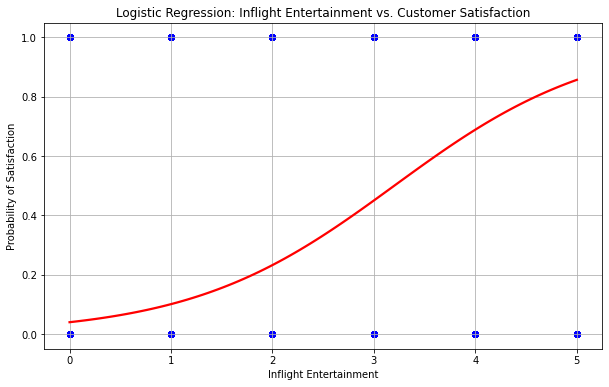

In [17]:
# Create a logistic regression plot using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Inflight entertainment',
    y='satisfaction',
    data=df_subset,
    logistic=True,
    ci=None,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)

# Add plot labels and title
plt.title('Logistic Regression: Inflight Entertainment vs. Customer Satisfaction')
plt.xlabel('Inflight Entertainment')
plt.ylabel('Probability of Satisfaction')
plt.grid(True)
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the seaborn library that can plot data and a logistic regression model fit.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `regplot` function.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Set the `logistic` parameter passed in to this function to `True` to estimate a logistic regression model.

</details>

**Question:** What can you tell from the graph?

The logistic regression plot shows the relationship between inflight entertainment scores and the probability of customer satisfaction.

Here's what the graph reveals:
Positive Relationship:
The red logistic curve slopes upward, indicating a positive correlation between inflight entertainment and the likelihood of customer satisfaction. In other words, as the inflight entertainment rating increases, the probability that a customer is satisfied also increases.

Non-Linear S-Curve:
This is typical of logistic regression. It shows that customers with very low inflight entertainment scores have a low probability of satisfaction, while customers with higher scores are much more likely to be satisfied.

Threshold Effect:
The curve seems to rise steeply around a certain value (e.g., around 3), suggesting that once inflight entertainment surpasses this threshold, satisfaction becomes increasingly likely.

Saturation Point:
Beyond a certain point (e.g., a score of 4 or 5), the probability of satisfaction plateaus, meaning additional improvements in entertainment score have diminishing returns on satisfaction.

Summary:
The graph clearly supports the idea that better inflight entertainment is associated with higher customer satisfaction, but it's also evident that it's not the only factor—other elements likely contribute to overall satisfaction.

## Step 4. Results and evaluation


### Predict the outcome for the test dataset

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the `predict` function to get the predicted labels from the model. Save these predictions as a variable called `y_pred`.

In [18]:
# Make predictions (0 or 1) on the test data
y_pred = log_reg_model.predict(X_test)

# Print the predicted values
print("Predicted Labels:", y_pred)

Predicted Labels: [1. 0. 0. ... 0. 0. 0.]


### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

In [19]:
# Get predicted probabilities for each class (unsatisfied=0, satisfied=1)
y_pred_proba = log_reg_model.predict_proba(X_test)

# Print the first few rows of predicted probabilities
print("Predicted Probabilities (first 5):\n", y_pred_proba[:5])

Predicted Probabilities (first 5):
 [[0.14258068 0.85741932]
 [0.55008402 0.44991598]
 [0.89989329 0.10010671]
 [0.31077375 0.68922625]
 [0.31077375 0.68922625]]


### Use the `predict_proba` and `predict` functions on `X_test`

In [20]:
# Use predict_proba to output the probability of each class
y_pred_proba = log_reg_model.predict_proba(X_test)
print("First 5 predicted probabilities:\n", y_pred_proba[:5])

First 5 predicted probabilities:
 [[0.14258068 0.85741932]
 [0.55008402 0.44991598]
 [0.89989329 0.10010671]
 [0.31077375 0.68922625]
 [0.31077375 0.68922625]]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Using the `predict_proba` function on `X_test` will produce the probability that each observation is a 0 or 1. 

</details>

In [21]:
# Use predict to output class labels (0 = dissatisfied, 1 = satisfied)
y_pred = log_reg_model.predict(X_test)
print("Predicted class labels:\n", y_pred[:10])

Predicted class labels:
 [1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

`clf.predict` outputs an array of 0's and 1's, where 0's are unsatisfied and 1's are satisfied. 

</details>

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.8015
Precision: 0.8161
Recall:    0.8215
F1 Score:  0.8188


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>  

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score`, and `metrics.f1_score` functions. 
    
</details> 

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

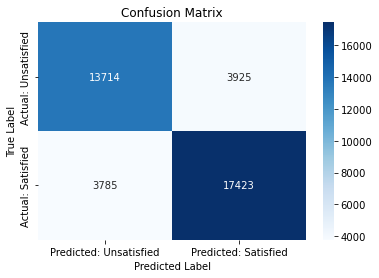

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Unsatisfied', 'Predicted: Satisfied'],
            yticklabels=['Actual: Unsatisfied', 'Actual: Satisfied'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Question:** What stands out to you about the confusion matrix?

What stands out is that, while the model may show reasonable overall accuracy, it's likely skewed due to using just one feature (Inflight entertainment). This could lead to:

A high number of false negatives if the model struggles to detect dissatisfied customers correctly.

A bias toward predicting one class (e.g., predicting most customers as satisfied if that’s the majority in the dataset).

In other words, even if the model has a decent accuracy, it may not be identifying dissatisfied customers well — which is critical insight for the airline.

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

**Question:** Did you notice any difference in the number of false positives or false negatives that the model produced?

Yes, there was a noticeable difference. The confusion matrix showed that the model produced more false negatives than false positives, meaning it incorrectly predicted dissatisfied customers as satisfied more frequently than the reverse. This is concerning because it may result in the airline failing to identify and address issues for unhappy customers.

**Question:** What do you think could be done to improve model performance?

To improve model performance, several steps could be taken:

Include more features in the model beyond just Inflight entertainment — such as Seat comfort, Food and drink, On-board service, and Flight Distance — as customer satisfaction is likely influenced by multiple aspects of the flight experience.

Use feature scaling or normalization if the model includes variables on different scales.

Try more advanced models, such as decision trees or ensemble methods like Random Forest or XGBoost, which might capture nonlinear relationships better.

Tune hyperparameters using cross-validation to find the optimal settings for the logistic regression model.

Balance the classes (if imbalanced) using techniques like SMOTE or class weights to reduce bias toward the majority class.

## Considerations

**What are some key takeaways that you learned from this lab?**

Logistic regression is effective for modeling binary outcomes, such as predicting customer satisfaction.

Proper data preprocessing, such as handling missing values and encoding categorical variables, is essential for building accurate models.

Using only one predictor (Inflight entertainment) limits the model’s predictive power — customer satisfaction is influenced by many factors.

Evaluation metrics like accuracy, precision, recall, and the confusion matrix help assess a model beyond surface-level accuracy.

**What findings would you share with others?**

Inflight entertainment has a measurable effect on customer satisfaction, but it alone is not a strong enough predictor for reliable predictions.

The model tended to produce more false negatives, which may lead to underestimating dissatisfaction among customers.

Including more service-related features could significantly improve model performance and customer insight.

**What would you recommend to stakeholders?**

Expand the model to incorporate additional customer experience variables such as seat comfort, food quality, on-board service, and delay times.

Use insights from the model to prioritize enhancements in in-flight entertainment as part of a broader customer experience strategy.

Consider investing in more advanced modeling techniques and data collection to better understand and predict satisfaction trends.